In [2]:

!python DESOM_train.py --dataset 'im' --save_epochs 1000 --map_size 20 20 --ae_type 'cnn2D' --ae_epochs 0 --iterations 15000 --som_iterations 10000  --model_batch_size 512 --ae_batch_size 512 --Tmax 12.0 --Tmin .5 --gamma 0.001


Loading Training set ..
Final Training size...  (245601, 441)
Shape before flattening : (2, 2, 128)
Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 441)]             0         
                                                                 
 reshape (Reshape)           (None, 21, 21, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 21, 21, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 10, 10, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPool

KeyboardInterrupt: 

In [2]:
print('done!')
#!python DESOM_train.py --dataset 'spectra' --save_epochs 20000 --map_size 20 20 --ae_type 'cnn1D' --ae_epochs 0 --iterations 3000 --som_iterations 3000  --model_batch_size 512 --ae_batch_size 256 --Tmax 12.0 --Tmin .7 --gamma 0.001
Stop

done!


NameError: name 'Stop' is not defined

In [ ]:
# import numpy as np

# tp = np.load ('inp_som.npy')
# tpn=[]
# for k1 in range(len(tp)):
#     tpn.append(tp[k1]/np.max(tp[k1]))
    
# tpn= np.array(tpn)
# np.save('inpn_som',tpn)
print('Done')

In [ ]:
# from sklearn.preprocessing import StandardScaler, MinMaxScaler
# import numpy as np
# tp = np.load ('inp_som.npy')
# scaler = MinMaxScaler()
# scaler.fit(tp)

# tpn= scaler.transform(tp)

# np.save('inpnm_som',tpn)
print('Done')


#print(np.shape(lines_outn))

In [ ]:
Stop

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np


from sklearn.preprocessing import StandardScaler
from DESOM import DESOM
from datasets import load_spectra_data

from helpers import utilities as uti
from helpers import desom_model as dm


#-------------------------------------------------- Paths -------------------------------------------------
root = os.getcwd()
#Model weights stored at
saved_weights = os.path.join(root, 'results/tmp/')

#Filenames
ae_path = os.path.join(saved_weights, 'ae_weights-epoch0_HT.h5')
model_path = os.path.join(saved_weights, 'DESOM_model_final_HT.h5')


# Load the Train SET(required to analyze nearest samples)
X = np.load('images_med_Norm_S.npy')

print (np.shape(X))


#---------------------------------------------- Model setup -------------------------------
#Load the DESOM model
map_size=(12,12)
som = dm.load_desom_trained(map_size, 'cnn2D', X.shape[1], ae_path, model_path)


#Generate components
map_size = som.map_size

#A list of NODES
nodes_list = uti.generate_list_of_coords(map_size)
#Disctionaries for FAST conversion
node2idx = uti.get_idx_map(nodes_list, map_size)
idx2node = uti.get_node_map(map_size)



#These are the BMU's you can see on the SOM...
decoded_prototypes = som.decode(som.prototypes)



#This map gives you the relation with the train set
#Please refer to the function for the logic.
#dist_map = dm.get_distance_map(som, X)



pred= som.predict(X)



# #Nearest Samples
# nearest_dict = {}
# for bmu in range(dist_map.shape[1]):
    
#     distances = dist_map[:, bmu]
#     #Minimum distance value
#     min_dist = np.min(distances)
#     #Specify indices of data points
#     closest_idx = np.where(distances == min_dist)[0]
    
#     nearest_dict[bmu] = closest_idx
    
# #nearest_dict


n_cell= map_size[0]*map_size[1]

hit_map1d=np.zeros(n_cell).astype(int)

for k1 in range(len(pred)):
    nc= pred[k1]
    hit_map1d[nc]+=1
    

    
hit_map2d=np.zeros((map_size[0],map_size[1])).astype(int)

n1= 0
for k2 in range(map_size[0]):
    for k1 in range(map_size[1]):            
        hit_map2d[k1,k2] =hit_map1d[n1]
        n1+=1



#Find nearest samples for node BMU
# bmu = 0
# #nearest_samples = nearest_dict[bmu]
# #Randomly sample 5 samples
# sampled_idx = np.random.choice(nearest_samples, 15)

# #Plot
# fig, ax = plt.subplots(len(sampled_idx), 1, figsize = (20,10),  squeeze=False)

# for i in range(len(sampled_idx)):
#     ax[i][0].plot(X[sampled_idx[i]])
#     ax[i][0].set_ylim(bottom=-10, top=10)
     
# plt.savefig("nearest_samples_{}".format(bmu))





#-------------------------- Predictions ---------------


# If we want to analyze the first row in the dataset
#          and use the AE on it

x_org, x_rec = dm.reconstruct_sample_from_data(X, som, 0)
dm.plot_reconstruction(x_org, x_rec)

#Given a sample(x) from the dataset...
k, predicted_bmu = dm.predict_bmu(x_org, som, decoded_prototypes)
print("Predicted spot on SOM: {}".format(k))

#Plot the BMU
plt.plot(predicted_bmu)
plt.savefig("BMU.png")




print ('Done')


2024-01-29 19:15:39.373044: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-29 19:15:39.434870: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


(245601, 441)
Shape before flattening : (55, 55, 128)
Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 194481)]          0         
                                                                 
 reshape (Reshape)           (None, 441, 441, 1)       0         
                                                                 
 conv2d (Conv2D)             (None, 441, 441, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 220, 220, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 110, 110, 64)      0         
 g2D)

2024-01-29 19:15:42.477103: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-29 19:15:42.487013: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-29 19:15:42.488165: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

ResourceExhaustedError: {{function_node __wrapped__StatelessRandomUniformV2_device_/job:localhost/replica:0/task:0/device:GPU:0}} OOM when allocating tensor with shape[3097600,194481] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:StatelessRandomUniformV2] name: 

In [ ]:
wl= np.load('z0_wavelength.npy')
#agn= np.load('agn_va.npy')
# If we want to analyze the first row in the dataset
#          and use the AE on it
n_spec= np.random.choice(len(X))
x_org, x_rec = dm.reconstruct_sample_from_data(X, som, n_spec)
#dm.plot_reconstruction(x_org, x_rec)


plt.figure(figsize=(10,10))
plt.plot(wl,x_org[0])
plt.plot(wl,x_rec[0],'--')
plt.xlim([6400,6850])
#plt.title(str(agn[n_spec]))

# #Given a sample(x) from the dataset...
# k, predicted_bmu = dm.predict_bmu(x_org, som, decoded_prototypes)
# print("Predicted spot on SOM: {}".format(k))

# #Plot the BMU
# plt.plot(predicted_bmu)
# plt.savefig("BMU.png")




print ('Done')


In [ ]:
hit_map2d

In [ ]:
plt.imshow(hit_map2d)
plt.colorbar()
plt.show()

In [ ]:
plt.imshow((hit_map2d))
plt.colorbar()
plt.show()

In [ ]:




        

    

# for k1 in range(len(X)):
#     pre= som.predict(X[k1])
    
            


In [ ]:
hit_map2d

In [ ]:
plt.colorbar(hit_map2d)

In [ ]:
for k1 in range(225):
    print (k1, len(nearest_dict[k1]))

In [ ]:

#nearest_dict[0]

# for k1 in range(0,20):
#     Xs=X[nearest_dict[k1]]
#     plt.figure(figsize=(20,10))
#     Xsm = np.mean(Xs,axis=0)
#     np.shape(Xsm)
#     plt.figure(k1)
#     plt.plot(Xsm)
#     plt.ylim([-5,5])

In [ ]:
import numpy as np

In [ ]:
x_org, x_rec = dm.reconstruct_sample_from_data(X, som, 3)
dm.plot_reconstruction(x_org, x_rec)

#Given a sample(x) from the dataset...
k, predicted_bmu = dm.predict_bmu(x_org, som, decoded_prototypes)
print("Predicted spot on SOM: {}".format(k))

#Plot the BMU
#plt.subplots(len(sampled_idx), 1, figsize = (25,50),  squeeze=False)

plt.plot(predicted_bmu)
#plt.xlim([6400,6800])
plt.savefig("BMU.png")

In [ ]:
X = np.load('bc03_may31.npy')


tp=[]

for k1 in range(len(X)):
    ll= np.median(X[k1,200:300])
    if ll>0:
        tp.append(X[k1]/ll)
        
tp = np.array(tp)
np.save('bc03n',tp)
np.shape(tp)


In [ ]:
plt.plot(tp[10])


In [ ]:
sdss=[]
X = np.load('sdss_p0.npy')

tp=[]
for k2 in range(8):
    print (k2)
    X = np.load('sdss_p'+str(k2)+'.npy',allow_pickle=True)
    for k1 in range(len(X)):
        ll= np.median(X[k1,200:300])
        if ll>0:
            tp.append(X[k1]/ll)
        
tp = np.array(tp)
np.shape(tp)

In [ ]:
plt.plot(tp[10])
np.shape(tp)

In [ ]:
np.save('sdss_pn',tp)

In [ ]:
nearest_dict[8]

In [ ]:
len(predicted_bmu)

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np


from sklearn.preprocessing import StandardScaler
from DESOM import DESOM
from datasets import load_spectra_data

from helpers import utilities as uti
from helpers import desom_model as dm


#-------------------------------------------------- Paths -------------------------------------------------
root = os.getcwd()
#Model weights stored at
saved_weights = os.path.join(root, 'results/tmp/')

#Filenames
ae_path = os.path.join(saved_weights, 'ae_weights-epoch0.h5')
model_path = os.path.join(saved_weights, 'DESOM_model_final.h5')


# Load the Train SET(required to analyze nearest samples)
X = np.load("sb99n.npy")

print (np.shape(X))


#---------------------------------------------- Model setup -------------------------------
#Load the DESOM model
map_size=(15,15)
som = dm.load_desom_trained(map_size, 'cnn1D', X.shape[1], ae_path, model_path)


#Generate components
map_size = som.map_size

#A list of NODES
nodes_list = uti.generate_list_of_coords(map_size)
#Disctionaries for FAST conversion
node2idx = uti.get_idx_map(nodes_list, map_size)
idx2node = uti.get_node_map(map_size)



#These are the BMU's you can see on the SOM...
decoded_prototypes = som.decode(som.prototypes)



#This map gives you the relation with the train set
#Please refer to the function for the logic.
dist_map = dm.get_distance_map(som, X)
np.shape(som.predict(X))

# #Nearest Samples
# nearest_dict = {}
# for bmu in range(dist_map.shape[1]):
    
#     distances = dist_map[:, bmu]
#     #Minimum distance value
#     min_dist = np.min(distances)
#     #Specify indices of data points
#     closest_idx = np.where(distances == min_dist)[0]
    
#     nearest_dict[bmu] = closest_idx
    
# #nearest_dict



# #Find nearest samples for node BMU
# bmu = 0
# nearest_samples = nearest_dict[bmu]
# #Randomly sample 5 samples
# sampled_idx = np.random.choice(nearest_samples, 15)

# #Plot
# fig, ax = plt.subplots(len(sampled_idx), 1, figsize = (20,10),  squeeze=False)

# for i in range(len(sampled_idx)):
#     ax[i][0].plot(X[sampled_idx[i]])
#     ax[i][0].set_ylim(bottom=-10, top=10)
     
# plt.savefig("nearest_samples_{}".format(bmu))





# #-------------------------- Predictions ---------------


# # If we want to analyze the first row in the dataset
# #          and use the AE on it

# x_org, x_rec = dm.reconstruct_sample_from_data(X, som, 0)
# dm.plot_reconstruction(x_org, x_rec)

# #Given a sample(x) from the dataset...
# k, predicted_bmu = dm.predict_bmu(x_org, som, decoded_prototypes)
# print("Predicted spot on SOM: {}".format(k))

# #Plot the BMU
# plt.plot(predicted_bmu)
# plt.savefig("BMU.png")




# print ('Done')


In [ ]:
som.predict(X)[10]

In [1]:
import numpy as np
import matplotlib.pyplot as plt
tp0 = np.load('images_med_1d.npy')
np.shape(tp0)

(245601, 441)

In [2]:

# #fig,axs = plt.subplots(1)
# #ax = axs[0]
# im = np.array(np.reshape(tp0[2],(21,21))).clip(min=10)
# mean = np.mean(im.flatten())
# std = np.std(im.flatten())
# im = (im-mean)/std
# im = im - np.amin(im)+0.01
# plt.hist(np.log10(np.reshape(im,-1)))


In [3]:
pr= np.percentile(tp0,[1,99],axis=1)
pr.shape
pr[1]
#print(np.min(pr[0]),np.max(pr[1]))

array([ 207.82840576, 1781.03840332, 2507.58984375, ...,   20.3429657 ,
         20.21778221,   21.18072739])

In [4]:
tp=[]
for k1 in range(len(tp0)):
    temp = tp0[k1]
    temp[temp<pr[0,k1]]=pr[0,k1]
    temp[temp>pr[1,k1]]=pr[1,k1]
    tp.append(temp)
    
    
    
    
    
tp= np.array(tp)
tp.shape    

(245601, 441)

In [5]:
# import MinMaxScaler, StandardScaler

from sklearn.preprocessing import MinMaxScaler, StandardScaler

#Choose a name for MinMaxScaler normalization 
scaler_M = MinMaxScaler() 

#Choose a name for StandardScaler normalization
scaler_S = StandardScaler()
# fit the 
scaler_M.fit(tp0)
scaler_S.fit(tp0)

tp_M=scaler_M.transform(tp0)
tp_S=scaler_S.transform(tp0)

tp_M.shape

(245601, 441)

(array([  9.,   1.,   2.,   2.,   3.,  10., 255., 134.,  11.,   3.,   1.,
          1.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   5.]),
 array([-405.58529663, -345.42385864, -285.26242065, -225.10098267,
        -164.93954468, -104.77811432,  -44.61667633,   15.54476261,
          75.70619965,  135.86763   ,  196.02906799,  256.19052124,
         316.35195923,  376.51339722,  436.67483521,  496.83624268,
         556.99768066,  617.15911865,  677.32055664,  737.48199463,
         797.64343262,  857.80487061,  917.96630859,  978.12774658,
        1038.28918457, 1098.45068359, 1158.61206055, 1218.77355957,
        1278.93493652, 1339.09643555, 1399.2578125 ]),
 <BarContainer object of 30 artists>)

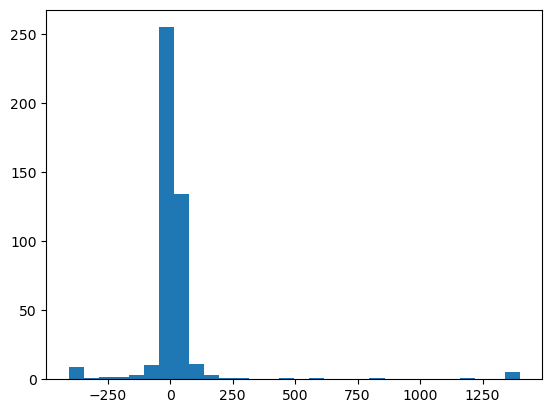

In [6]:
plt.hist(tp[4],30)

(array([  4.,   5.,   1.,   1.,   3.,   1.,   4.,   6.,  23., 293.,  69.,
          9.,   8.,   3.,   1.,   1.,   0.,   0.,   1.,   2.,   2.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   2.,   1.]),
 array([-33.9477005 , -30.36283493, -26.77796936, -23.19310379,
        -19.60823822, -16.02337265, -12.43850708,  -8.85364151,
         -5.26877594,  -1.68391037,   1.9009552 ,   5.48582077,
          9.07068634,  12.65555191,  16.24041748,  19.82528305,
         23.41014862,  26.99501419,  30.57987976,  34.16474533,
         37.7496109 ,  41.33447647,  44.91934204,  48.50420761,
         52.08907318,  55.67393875,  59.25880432,  62.84366989,
         66.42853546,  70.01339722,  73.5982666 ]),
 <BarContainer object of 30 artists>)

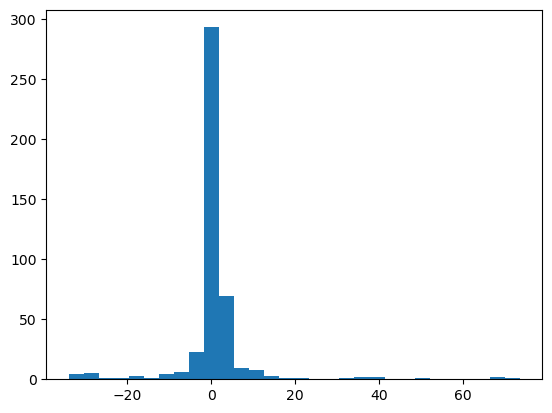

In [7]:
plt.hist(tp_S[4],30)

In [8]:
tp_ML = np.log10(tp_M+.01)

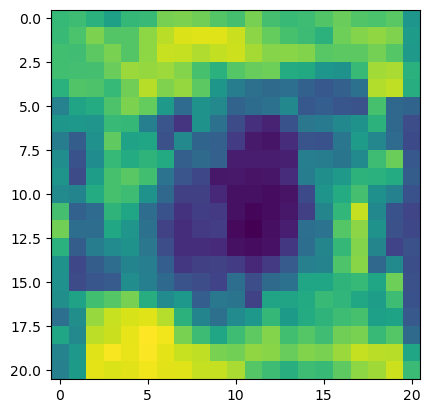

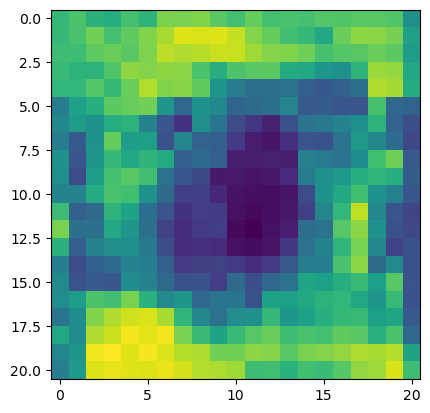

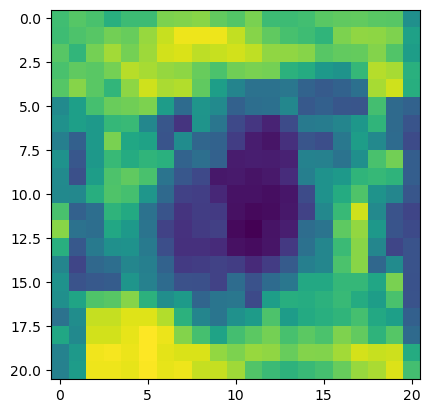

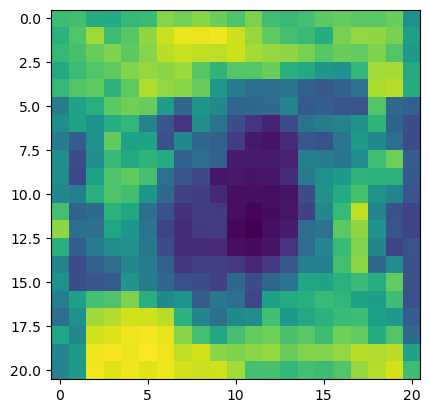

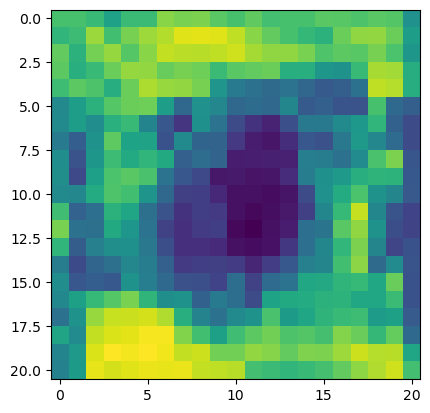

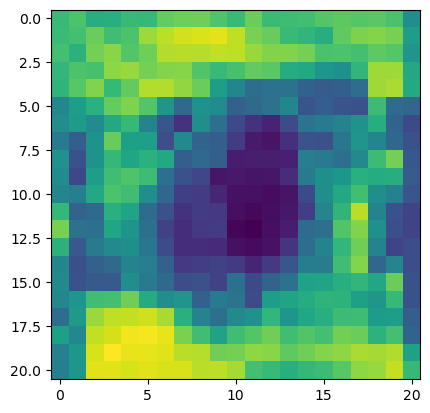

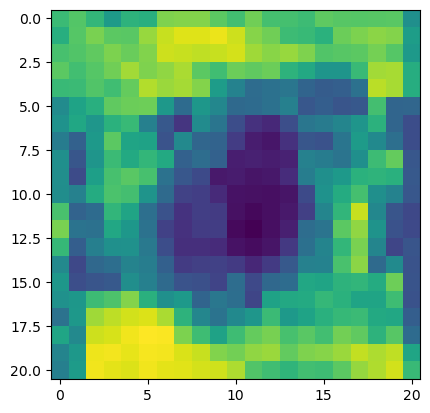

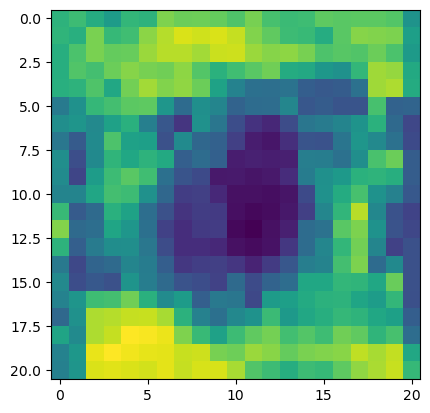

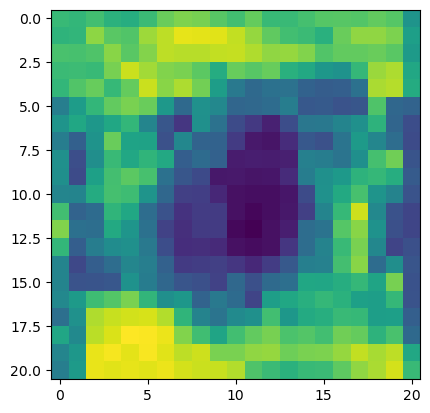

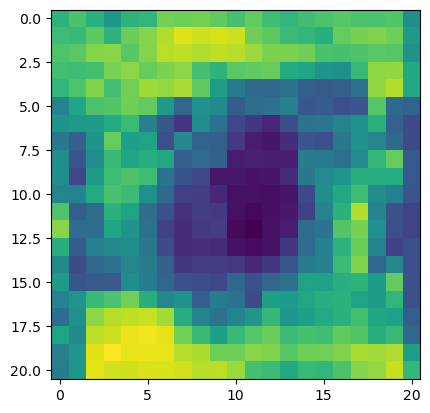

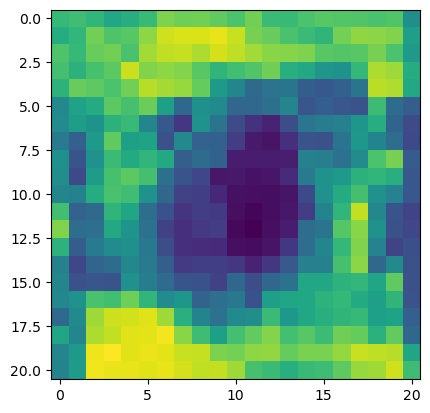

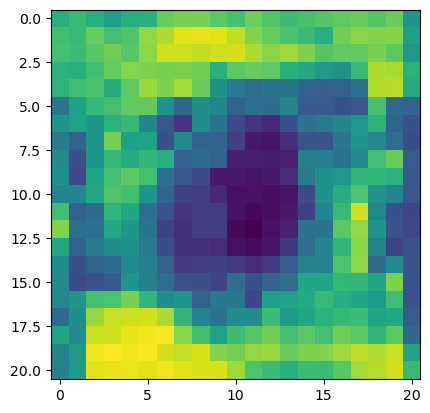

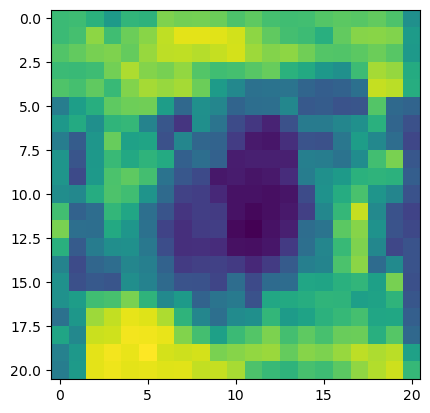

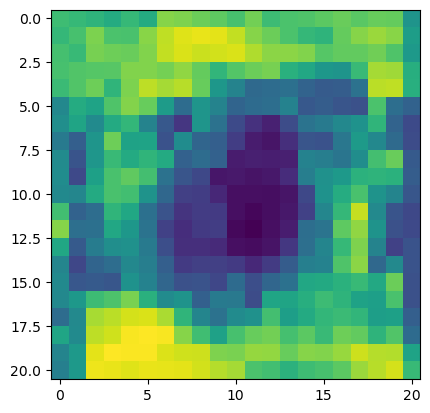

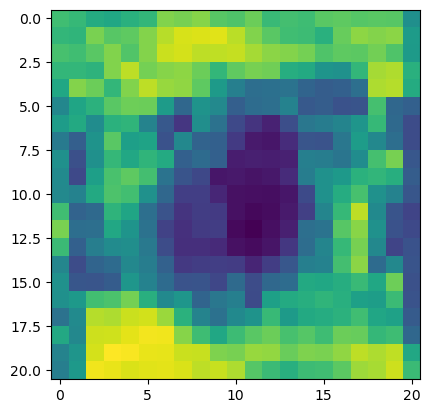

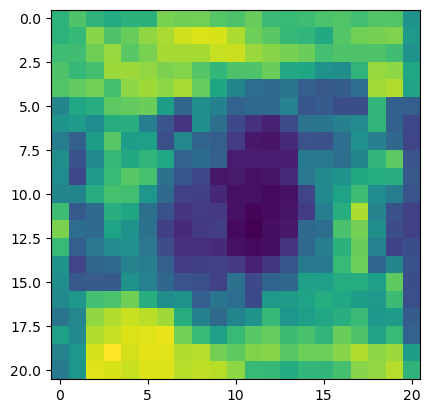

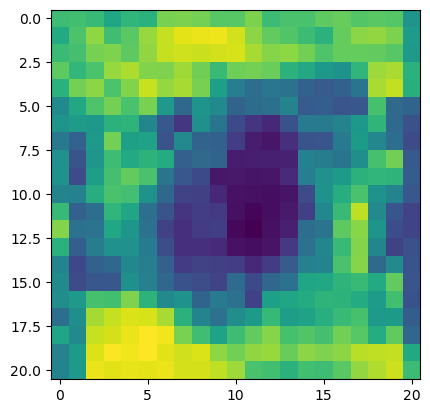

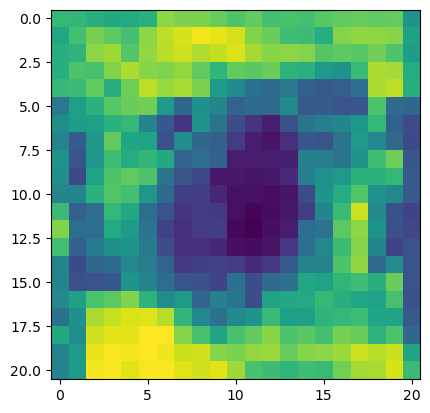

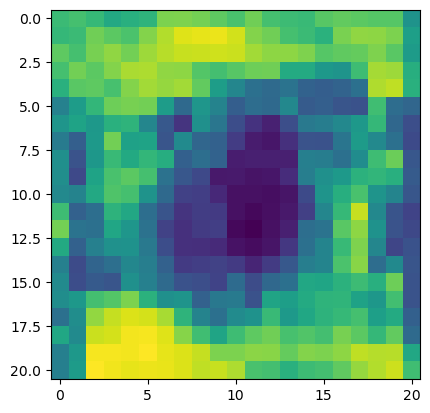

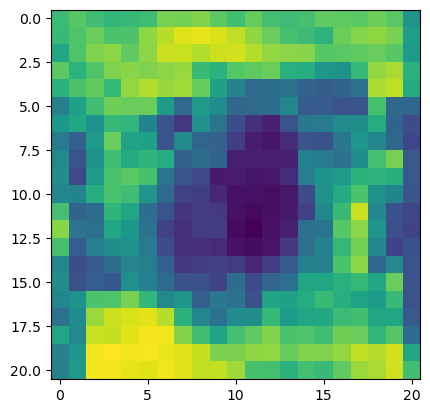

In [10]:
n_1= np.random.choice(len(tp0),20)
for k1 in n_1:
    plt.figure(k1)
    #plt.hist(tp_ML[k1],30)
    plt.imshow(np.reshape(tp_M[k1],(21,21)))

In [ ]:
np.save('images_med_1dS',tp_S)
np.save('images_med_1dM',tp_M)

In [ ]:
m = np.array(np.reshape(tp0[11112],(21,21))).clip(min=0)
mean = np.mean(im.flatten())
std = np.std(im.flatten())
im = (im-mean)/std
im = im - np.amin(im)+0.01
plt.imshow(np.log10((im)))
#plt.hist(np.log10(np.reshape(im,-1)))


In [ ]:
tp_M.shape